
## About Dataset
Context
To Explore more on Regression Algorithm

## Content
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

1. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS: proportion of non-retail business acres per town
3. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. NOX: nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124
5. RM: average number of rooms per dwelling
6. AGE: proportion of owner-occupied units built prior to 1940
7. DIS: weighted distances to ﬁve Boston employment centers
8. RAD: index of accessibility to radial highways
9. TAX: full-value property-tax rate per $10,000
10. PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
11. MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('BostonHousing.csv')

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


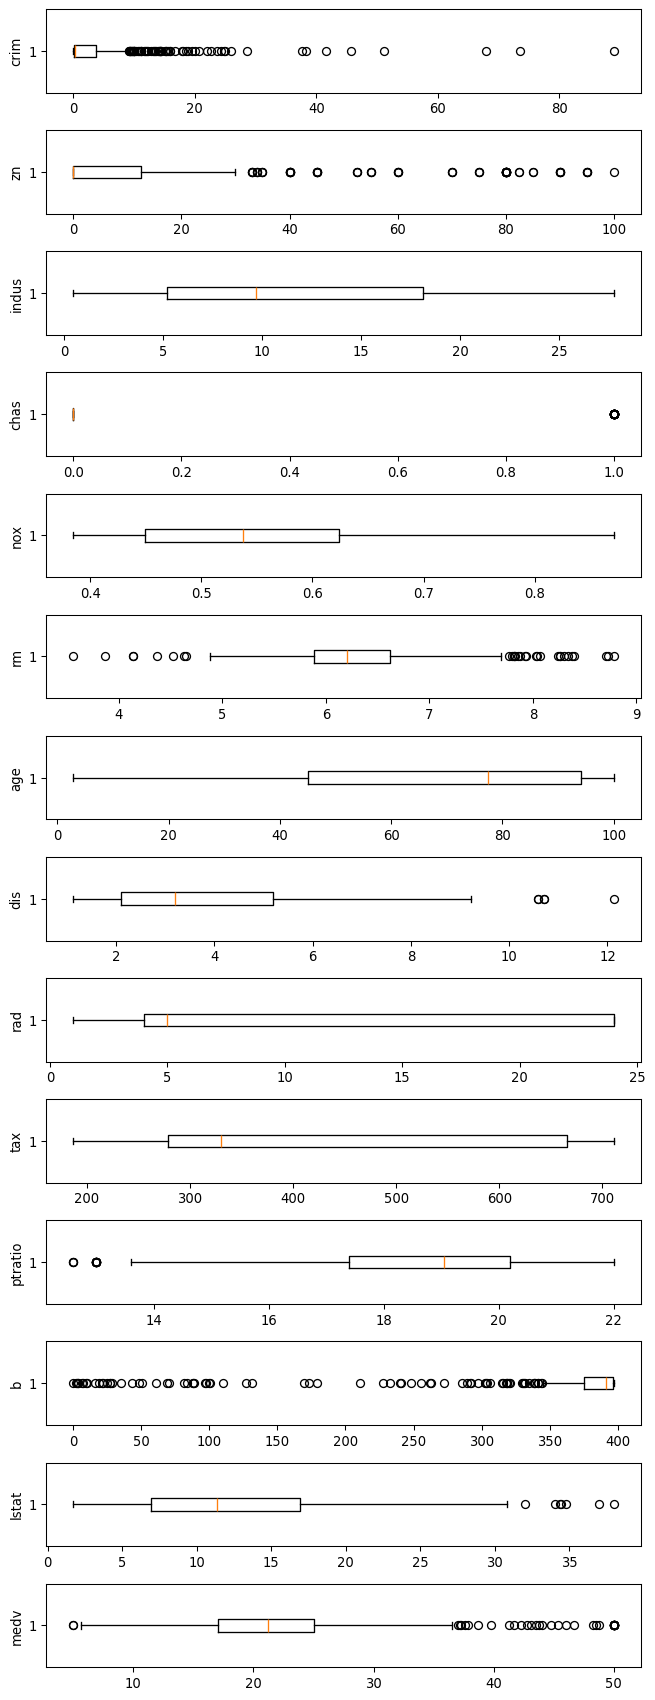

In [14]:
fig,axi=plt.subplots(len(df.columns),1,figsize=(7,18),dpi=95)

for i,col in enumerate(df.columns):
    axi[i].boxplot(df[col],vert=False)
    axi[i].set_ylabel(col)
plt.tight_layout()
plt.show()

<Axes: >

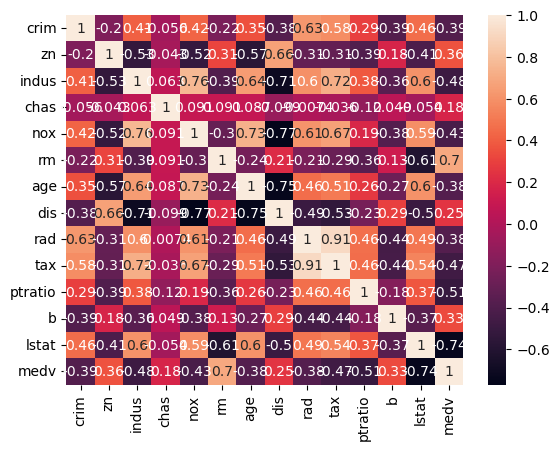

In [15]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X=df.drop(['medv'],axis=1)
Y=df['medv']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [20]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [18]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [21]:
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [22]:
X_train_scaled

array([[-0.40679535, -0.50281197, -1.24707626, ..., -0.20515671,
         0.40451209, -1.07775629],
       [ 0.00799171, -0.50281197,  1.21828293, ..., -1.57625236,
        -3.09803734,  0.35116456],
       [-0.41344957,  0.36438137, -1.12179223, ..., -1.48779457,
         0.32659121, -1.22625199],
       ...,
       [-0.41595107,  2.96596138, -1.31187834, ..., -0.55898784,
         0.36812613, -0.91385066],
       [ 0.92638065, -0.50281197,  1.00515608, ...,  0.8563367 ,
        -2.84814129,  1.50690937],
       [-0.39020739, -0.50281197, -0.36864804, ...,  1.16593894,
        -3.29495634, -0.26383177]], shape=(379, 13))

In [54]:
X_test_scaled

array([[-0.40670502, -0.50281197, -1.0181089 , ..., -0.73590341,
         0.42030222, -0.48657531],
       [-0.41096131,  1.23157471, -0.67825799, ..., -0.29361449,
         0.4363212 , -1.25847275],
       [-0.40502371, -0.50281197,  2.39336067, ...,  0.81210781,
         0.35862916,  0.77843992],
       ...,
       [-0.40071683, -0.50281197, -0.60625567, ..., -0.16092782,
         0.28150923, -0.93906691],
       [-0.37546815, -0.50281197, -0.5385735 , ...,  0.59096335,
         0.4363212 , -0.67429629],
       [-0.41550665,  3.18275972, -1.00370844, ..., -0.16092782,
         0.38517489, -0.86201726]], shape=(127, 13))

In [55]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression(n_jobs=-1)

In [56]:
linear.fit(X_train_scaled,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [57]:
linear.coef_

array([-1.06546379,  0.68154987,  0.33928836,  0.73726309, -1.93178062,
        3.14172655, -0.25586276, -2.95561026,  2.21416067, -1.65127265,
       -2.08714915,  1.15235744, -3.69504236])

In [58]:
linear.intercept_

np.float64(22.90791556728232)

In [60]:
y_pred=linear.predict(X_test_scaled)

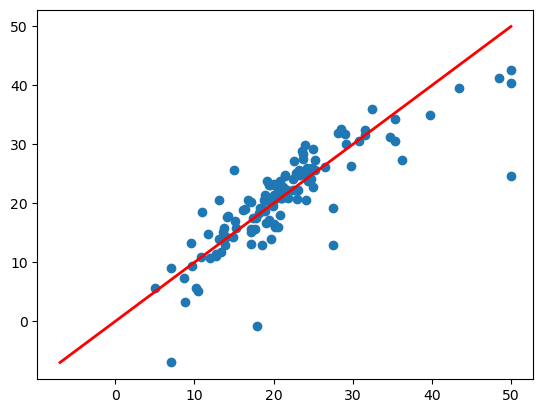

In [63]:
plt.scatter(Y_test,y_pred)
min_val = min(Y_test.min(), y_pred.min())
max_val = max(Y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

In [64]:
resiual=Y_test-y_pred

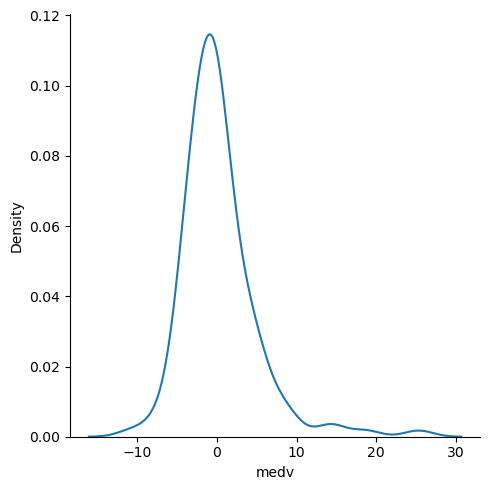

In [65]:
sns.displot(resiual,kind='kde')

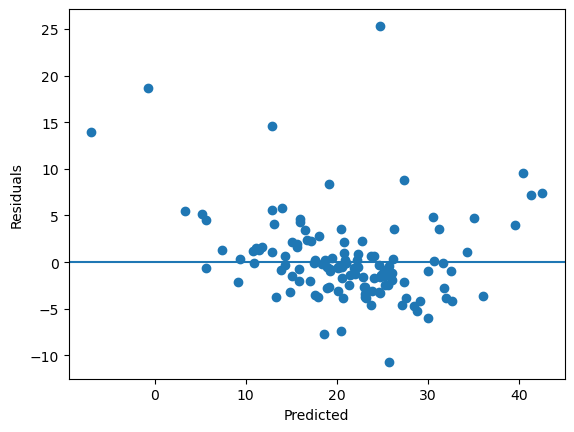

In [68]:
plt.scatter(y_pred, resiual)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)
print("r2_score: ",r2)

mae:  3.0609395954370315
mse:  22.098694827097972
rmse:  4.70092489060376
r2_score:  0.6844267283527132


In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=linear.predict(X_train_scaled)
mae=mean_absolute_error(Y_train,y_pred)
mse=mean_squared_error(Y_train,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_train,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)
print("r2_score: ",r2)

mae:  3.3662875144521176
mse:  22.34005799215287
rmse:  4.726527053995658
r2_score:  0.748087259862344


Metric	Train	Test
MAE	3.37	3.06
RMSE	4.73	4.70

Errors are almost the same
Test error is not exploding
Indicates good generalization
This is excellent for a linear model.

In [73]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)
print("r2_score: ",r2)

mae:  3.0589286010846246
mse:  22.116880575204682
rmse:  4.702858766240453
r2_score:  0.6841670326524789


In [75]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)
print("r2_score: ",r2)

mae:  3.51177514150219
mse:  26.006934373904375
rmse:  5.0996994395654704
r2_score:  0.628616376211253


In [76]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)
print("r2_score: ",r2)

mae:  3.460453571020929
mse:  26.540970518317174
rmse:  5.151792942104445
r2_score:  0.6209902455918285


## Side-by-side comparison (TEST data)
🔹 Linear Regression

MAE: 3.06

RMSE: 4.70

R²: 0.684

🔹 Ridge Regression

MAE: 3.059 ✅ (lowest)

RMSE: 4.703

R²: 0.684

👉 Linear ≈ Ridge (almost identical performance)

🔻 Lasso Regression

MAE: 3.51 ⬆️ (worse)

RMSE: 5.10 ⬆️

R²: 0.629 ⬇️

🔻 Elastic Net

MAE: 3.46 ⬆️

RMSE: 5.15 ⬆️

R²: 0.621 ⬇️

In [77]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elastic=ElasticNetCV(cv=5)
elastic.fit(X_train_scaled,Y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)
print("r2_score: ",r2)

mae:  3.0509937642514813
mse:  22.165015840956695
rmse:  4.707973644887649
r2_score:  0.6834796525418514


In [78]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso=LassoCV()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)
print("r2_score: ",r2)

mae:  3.0557409945529184
mse:  22.110646496602943
rmse:  4.702195922821905
r2_score:  0.6842560563977929


In [80]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridgecv=RidgeCV()
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)
print("r2_score: ",r2)

mae:  3.0426693363414405
mse:  22.27220778275515
rmse:  4.719343999196832
r2_score:  0.6819489326494674
